In [30]:
import pandas as pd
from sklearn.preprocessing import scale, StandardScaler, normalize

# Масштабирование признаков

Посмотрим на метрики, которые получаему на выходе PPI_v1.py

In [4]:
df_topo_up = pd.read_csv('DATA/Fibroblasts_Induced_Neurons/df_topo_up_Fibroblasts_Induced_Neurons.csv', index_col =0)
df_topo_down = pd.read_csv('DATA/Fibroblasts_Induced_Neurons/df_topo_down_Fibroblasts_Induced_Neurons.csv', index_col =0)

In [5]:
df_topo_up.head()

,logFC,betweenness,pagerank,closeness,katz,hits_authority,hits_hub,eigenvector,eigentrust
AADAC,10.000070,0.000000,0.000266,0.181758,0.020248,1.168578e-05,1.168578e-05,1.168578e-05,0.000024
KRTAP1-5,9.682907,0.000000,0.000259,0.500000,0.020252,4.246720e-53,4.246720e-53,2.361510e-51,0.000133
MMP3,9.304125,0.001361,0.001081,0.318297,0.025719,2.326172e-02,2.326172e-02,2.326172e-02,0.001476
IL6,9.011785,0.001195,0.000852,0.296654,0.023254,9.421064e-03,9.421064e-03,9.421064e-03,0.000827
HINT3,8.938839,0.000000,0.000099,NaN,0.020037,0.000000e+00,0.000000e+00,0.000000e+00,0.000000


In [6]:
df_topo_down.head()

,logFC,betweenness,pagerank,closeness,katz,hits_authority,hits_hub,eigenvector,eigentrust
NEUROD6,-11.440812,3.846527e-04,0.000534,0.288690,0.023274,2.546507e-02,2.546507e-02,2.546506e-02,0.000128
HBE1,-10.332124,1.364546e-04,0.000621,0.164711,0.021522,1.656822e-06,1.656822e-06,1.656823e-06,0.000820
HBZ,-10.272220,6.676678e-07,0.000768,0.141564,0.021731,2.442778e-07,2.442778e-07,2.442780e-07,0.000775
ELAVL4,-9.500666,9.736192e-04,0.000881,0.268251,0.022551,4.512574e-03,4.512574e-03,4.512576e-03,0.000407
HBG1,-9.486022,1.364546e-04,0.000747,0.164736,0.021742,1.716867e-06,1.716867e-06,1.716868e-06,0.000707


Объединим метрики, рассчитанные для up и down, чтобы посмотреть распределение метрик в целом.

In [15]:
df_topo_concated = pd.concat([df_topo_up, df_topo_down])

In [16]:
df_topo_concated.head()

,logFC,betweenness,pagerank,closeness,katz,hits_authority,hits_hub,eigenvector,eigentrust
AADAC,10.000070,0.000000,0.000266,0.181758,0.020248,1.168578e-05,1.168578e-05,1.168578e-05,0.000024
KRTAP1-5,9.682907,0.000000,0.000259,0.500000,0.020252,4.246720e-53,4.246720e-53,2.361510e-51,0.000133
MMP3,9.304125,0.001361,0.001081,0.318297,0.025719,2.326172e-02,2.326172e-02,2.326172e-02,0.001476
IL6,9.011785,0.001195,0.000852,0.296654,0.023254,9.421064e-03,9.421064e-03,9.421064e-03,0.000827
HINT3,8.938839,0.000000,0.000099,NaN,0.020037,0.000000e+00,0.000000e+00,0.000000e+00,0.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f53406f9250>,
      dtype=object)

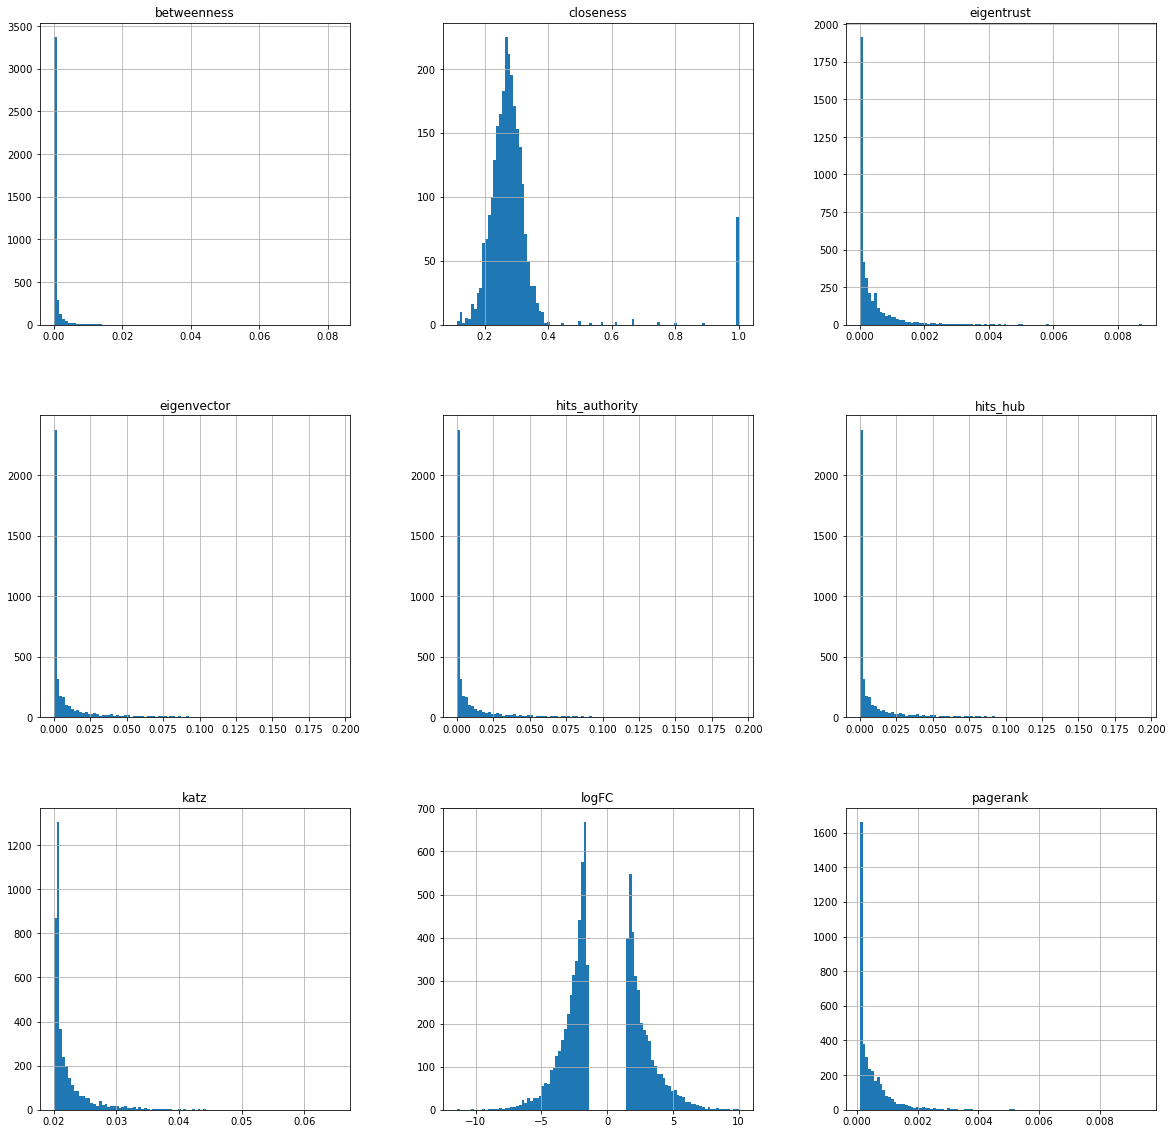

In [17]:
df_topo_concated.hist(figsize=(20,20), bins=100)

Загрузим датафрейм, который получается в результате объединения up и down, и последующим стандартизацией.

In [20]:
df_topo_score_concated_scaled = pd.read_csv('DATA/Fibroblasts_Induced_Neurons/df_topo_score_Fibroblasts_Induced_Neurons.csv', index_col =0)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f53405185b0>,
      dtype=object)

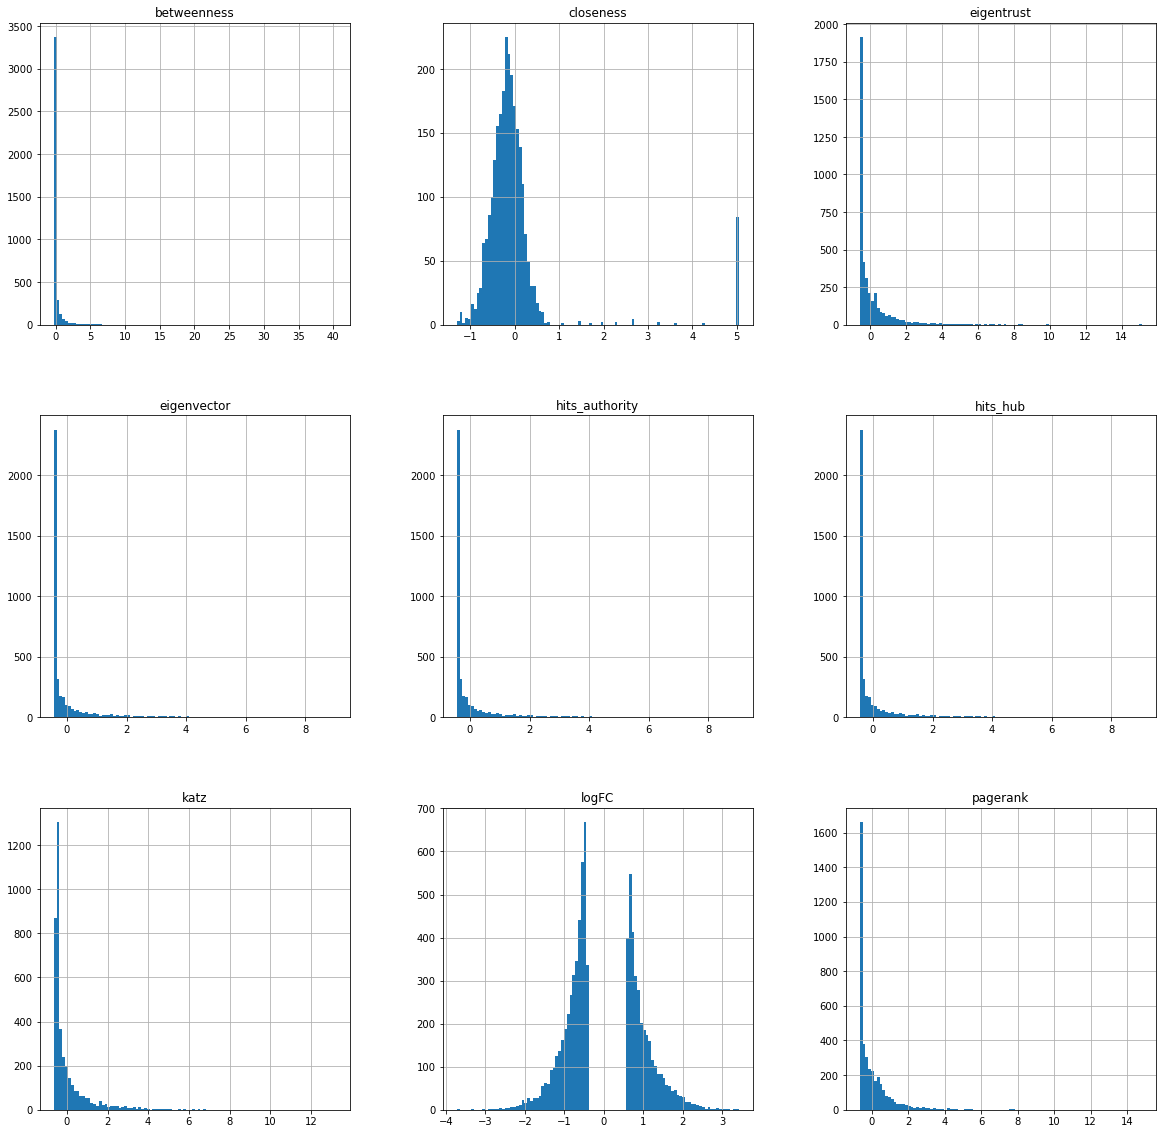

In [21]:
df_topo_score_concated_scaled.hist(figsize=(20,20), bins=100)

Посмотрим, какой inf_score рассчитывается на стандартизированных метриках. 

In [38]:
df_inf_score = pd.read_csv('DATA/Fibroblasts_Induced_Neurons/Validation_results_Fibroblasts_Induced_Neurons/Fibroblasts_Induced_Neurons_21/df_inf_Fibroblasts_Induced_Neurons.csv', index_col =0)
df_inf_score.head()

,logFC,betweenness,pagerank,closeness,katz,hits_authority,hits_hub,eigenvector,eigentrust,inf_score
AADAC,3.412757,-0.270940,-0.389918,-0.809207,-0.578665,-0.441983,-0.441983,-0.441983,-0.536650,15.353397
KRTAP1-5,3.307154,-0.270940,-0.402308,1.467684,-0.577381,-0.442554,-0.442554,-0.442554,-0.341427,17.244777
MMP3,3.181034,0.401136,0.968932,0.167671,1.108382,0.695062,0.695062,0.695062,2.072715,38.750894
IL6,3.083696,0.319068,0.587267,0.012823,0.348525,0.018184,0.018184,0.018184,0.907061,6.729788
HINT3,3.059408,-0.270940,-0.668916,NaN,-0.643638,-0.442554,-0.442554,-0.442554,-0.579797,11.904763


# Способы стандартизации

In [22]:
df_topo_concated_before_scale = df_topo_concated.copy()

# Используя scale

In [31]:
df_topo_concated_scaled_by_scale = pd.DataFrame(scale(df_topo_concated_before_scale))
df_topo_concated_scaled_by_scale.columns = df_topo_concated.columns
df_topo_concated_scaled_by_scale.index = df_topo_concated.index

In [32]:
df_topo_concated_scaled_by_scale.head()

,logFC,betweenness,pagerank,closeness,katz,hits_authority,hits_hub,eigenvector,eigentrust
AADAC,3.412757,-0.270940,-0.389918,-0.809207,-0.578665,-0.441983,-0.441983,-0.441983,-0.536650
KRTAP1-5,3.307154,-0.270940,-0.402308,1.467684,-0.577381,-0.442554,-0.442554,-0.442554,-0.341427
MMP3,3.181034,0.401136,0.968932,0.167671,1.108382,0.695062,0.695062,0.695062,2.072715
IL6,3.083696,0.319068,0.587267,0.012823,0.348525,0.018184,0.018184,0.018184,0.907061
HINT3,3.059408,-0.270940,-0.668916,NaN,-0.643638,-0.442554,-0.442554,-0.442554,-0.579797


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f533be76670>,
      dtype=object)

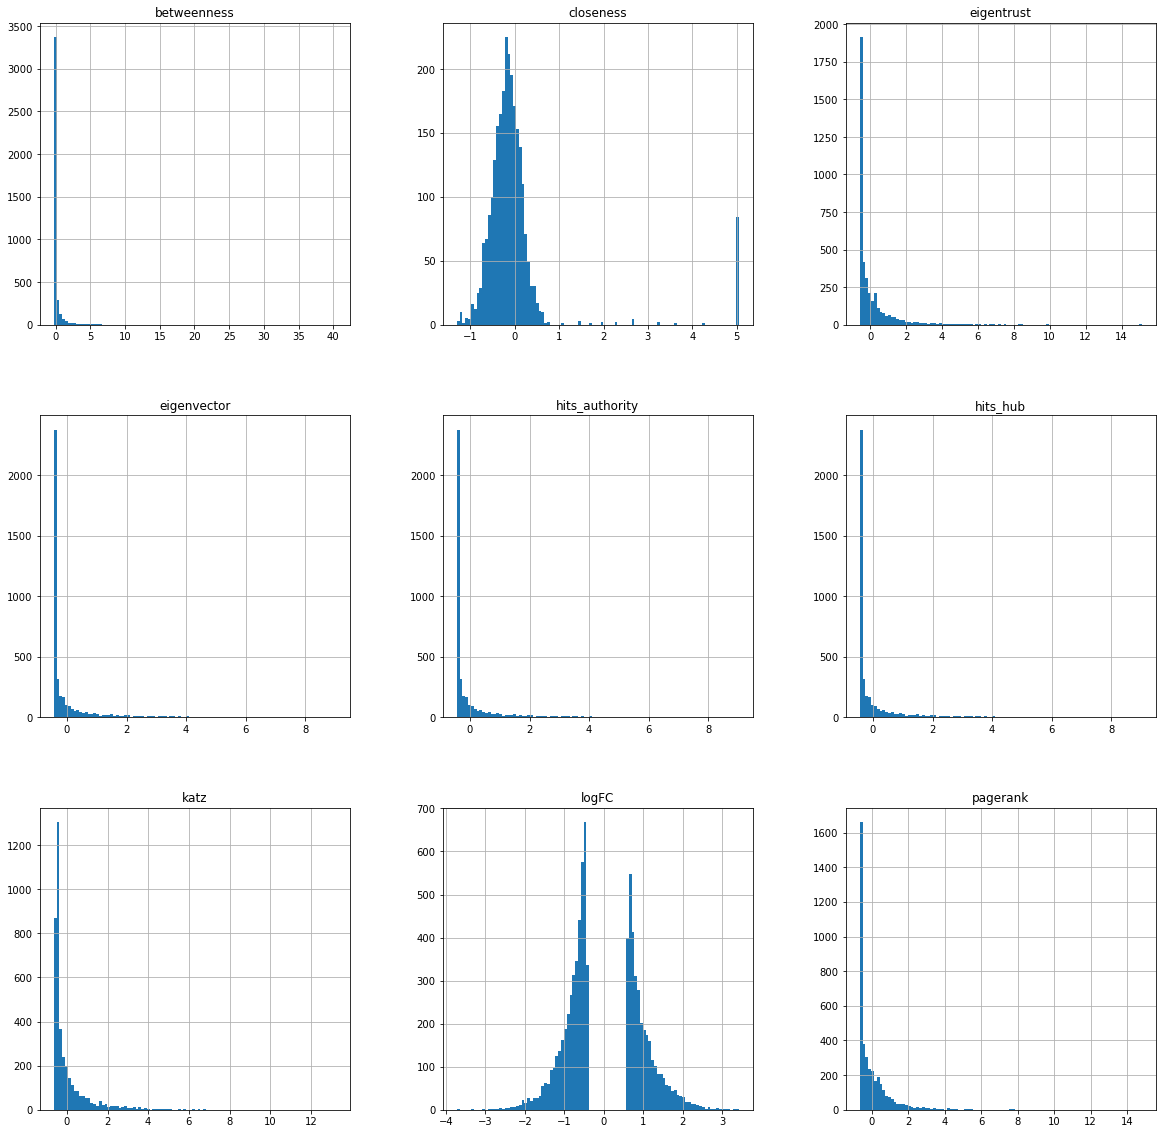

In [29]:
df_topo_concated_scaled_by_scale.hist(figsize=(20,20), bins=100)

# Используя StandardScaler

In [34]:
scaler = StandardScaler()
df_topo_concated_scaled_by_StandardScaler = scaler.fit_transform(df_topo_concated_before_scale)
df_topo_concated_scaled_by_StandardScaler = pd.DataFrame(df_topo_concated_scaled_by_StandardScaler)
df_topo_concated_scaled_by_StandardScaler.columns = df_topo_concated_before_scale.columns
df_topo_concated_scaled_by_StandardScaler.index = df_topo_concated_before_scale.index
df_topo_concated_scaled_by_StandardScaler.head()

,logFC,betweenness,pagerank,closeness,katz,hits_authority,hits_hub,eigenvector,eigentrust
AADAC,3.412757,-0.270940,-0.389918,-0.809207,-0.578665,-0.441983,-0.441983,-0.441983,-0.536650
KRTAP1-5,3.307154,-0.270940,-0.402308,1.467684,-0.577381,-0.442554,-0.442554,-0.442554,-0.341427
MMP3,3.181034,0.401136,0.968932,0.167671,1.108382,0.695062,0.695062,0.695062,2.072715
IL6,3.083696,0.319068,0.587267,0.012823,0.348525,0.018184,0.018184,0.018184,0.907061
HINT3,3.059408,-0.270940,-0.668916,NaN,-0.643638,-0.442554,-0.442554,-0.442554,-0.579797


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f533b3792b0>,
      dtype=object)

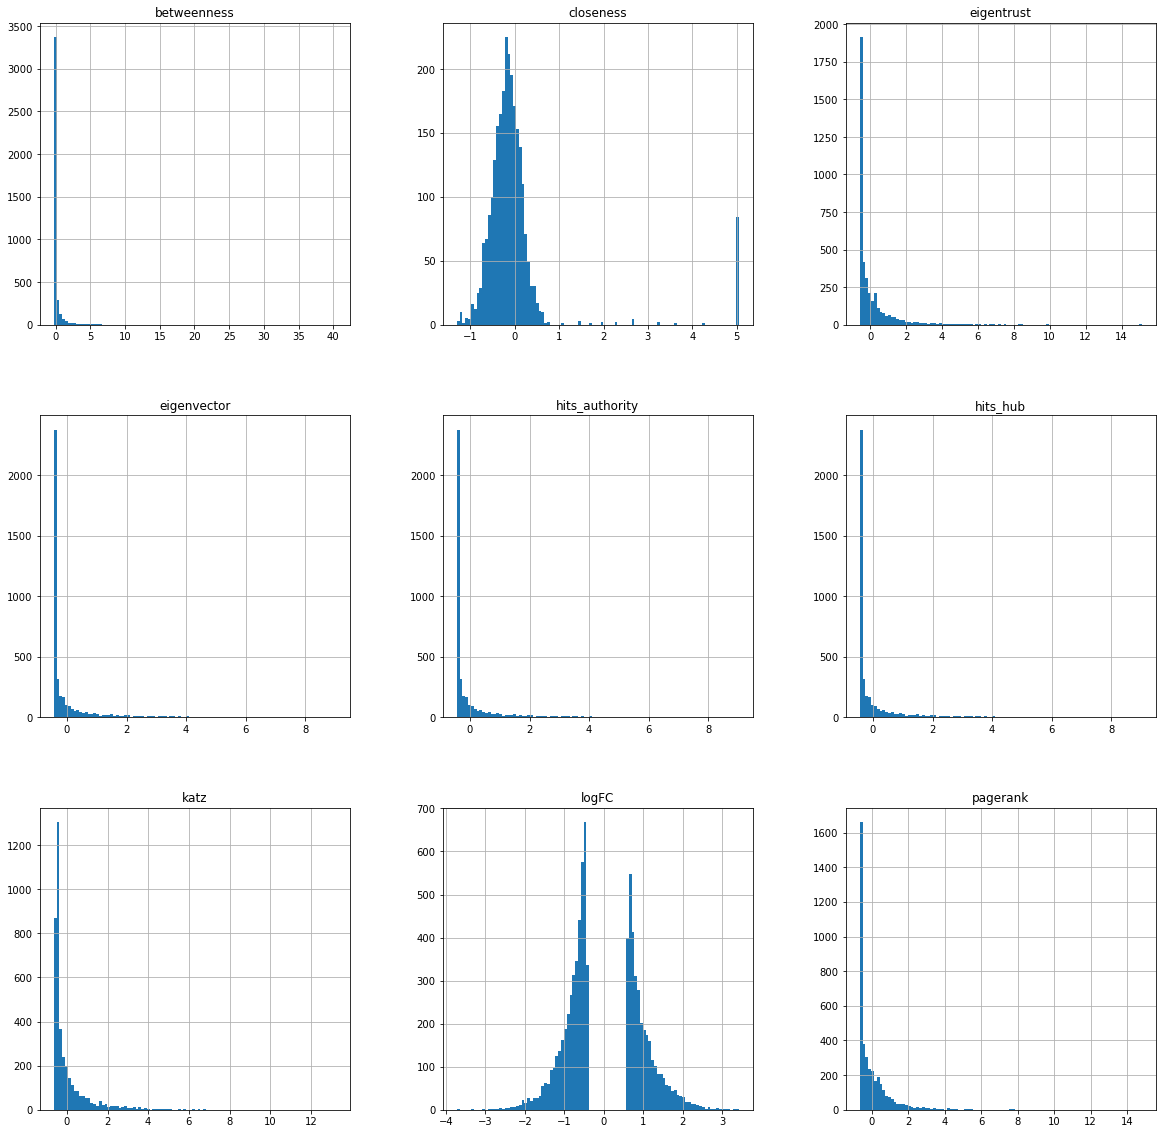

In [35]:
df_topo_concated_scaled_by_StandardScaler.hist(figsize=(20,20), bins=100)

# Используя normalize

In [40]:
df_topo_concated_normalized = df_topo_concated_before_scale.copy()
for i in range(df_topo_concated_normalized.shape[1]):
    df_topo_concated_normalized.iloc[:,i][list(map(lambda x: not x, list(df_topo_concated_normalized.iloc[:,i].isna())))] = normalize(df_topo_concated_before_scale.iloc[:,i][list(map(lambda x: not x, list(df_topo_concated_before_scale.iloc[:,i].isna())))].values.reshape(-1, 1),axis = 0)
df_topo_concated_normalized = pd.DataFrame(df_topo_concated_normalized)
df_topo_concated_normalized.columns = df_topo_concated_before_scale.columns
df_topo_concated_normalized.index = df_topo_concated_before_scale.index
df_topo_concated_normalized.head()

,logFC,betweenness,pagerank,closeness,katz,hits_authority,hits_hub,eigenvector,eigentrust
AADAC,0.037269,0.000000,0.005385,0.010964,0.014317,8.263093e-06,8.263093e-06,8.263095e-06,0.000590
KRTAP1-5,0.036087,0.000000,0.005234,0.030161,0.014320,3.002885e-53,3.002885e-53,1.669840e-51,0.003261
MMP3,0.034675,0.010257,0.021891,0.019200,0.018186,1.644852e-02,1.644852e-02,1.644852e-02,0.036283
IL6,0.033586,0.009004,0.017255,0.017895,0.016443,6.661698e-03,6.661698e-03,6.661699e-03,0.020338
HINT3,0.033314,0.000000,0.001996,NaN,0.014168,0.000000e+00,0.000000e+00,0.000000e+00,0.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f533a619b50>,
      dtype=object)

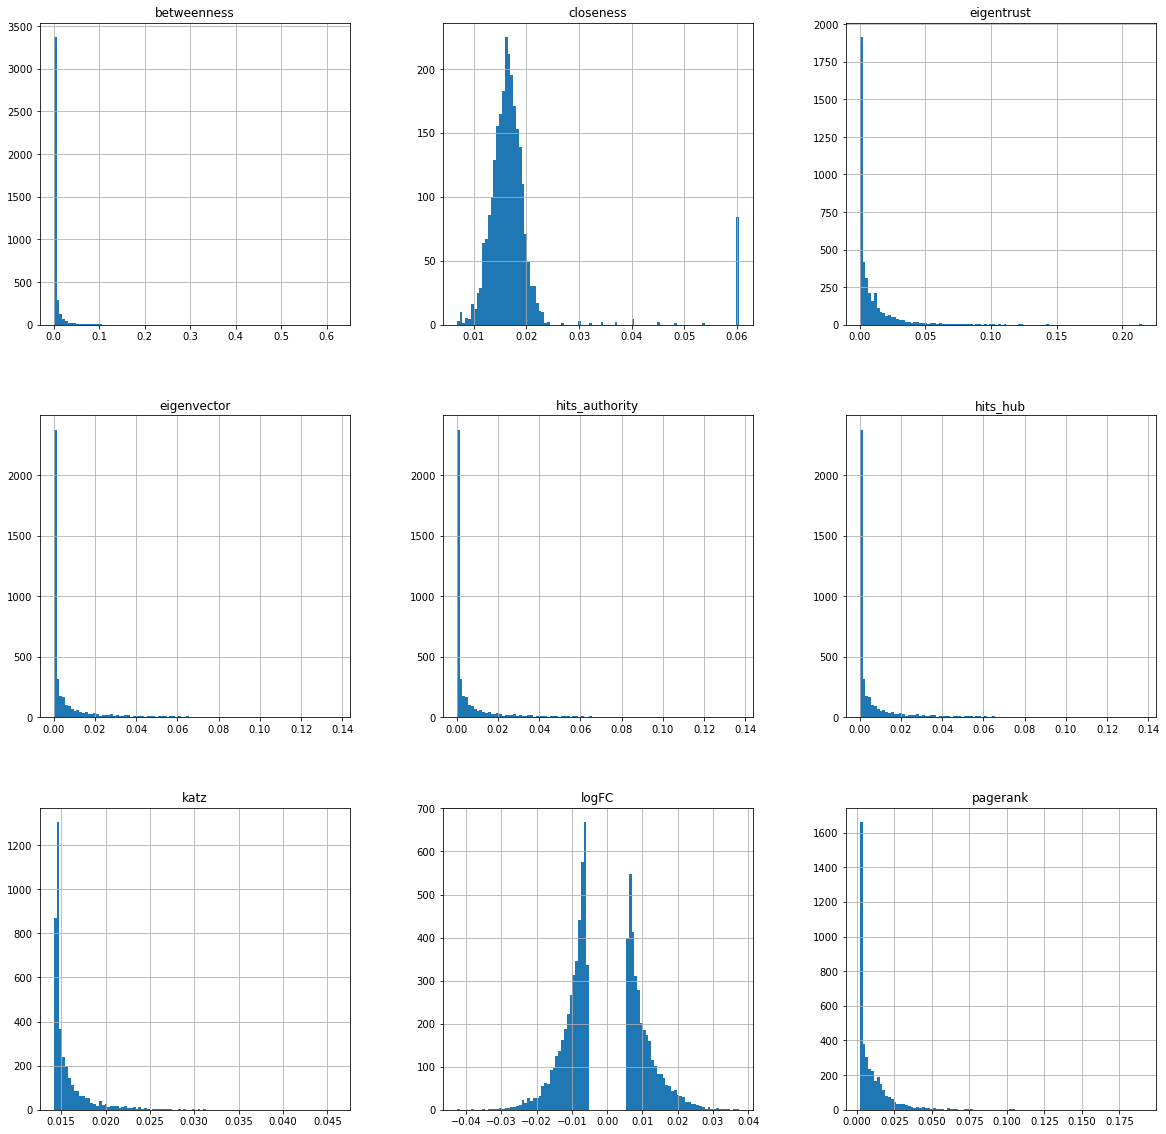

In [41]:
df_topo_concated_normalized.hist(figsize=(20,20), bins=100)